<ins> Exploratory Data Analysis (EDA) Notebook <ins/>
> By: Kathirvel Kumararaja 

(Colloborated with Matteo Cangiano, Q Leedham, and Daniel Sheehan during Geoprocessing and Data Collection / Data Engineering phase)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.feature as cfeature

/Users/kraja/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


__Importing Data from Kaggle__

In [2]:
# Dataset 1
# using dataset from https://www.kaggle.com/devvret/brazil-real-estate-listings
df_br = pd.read_csv('../datasets/_source/properati_br_2016_11_01_properties_rent-Copy1.csv')

In [3]:
# Dataset 2
# using data for Sāo Paulo from https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019

df_sp = pd.read_csv('../datasets/_source/sao-paulo-properties-april-2019-Copy1.csv')

## Data Review and Cleaning

__Checking shape of data__

In [4]:
df_br.shape

(97353, 25)

In [5]:
df_sp.shape

(13640, 16)

In [6]:
df_br.isnull().sum()

created_on                        0
operation                         0
property_type                     0
place_name                        0
place_with_parent_names           0
geonames_id                   97350
lat_lon                       51323
lat                           51323
lon                           51323
price                          5019
currency                       5020
price_aprox_local_currency     5019
price_aprox_usd                5019
surface_total_in_m2           81505
surface_covered_in_m2         21769
price_usd_per_m2              26938
price_per_m2                  26938
floor                         92068
rooms                         38590
expenses                      65580
properati_url                     0
description                       0
title                             0
image_thumbnail                5134
location                      51323
dtype: int64

In [7]:
df_sp.isnull().sum().sum()

0

__Observation__

For our analysis we need longitude and latitude to identify where informal settlements are.Hence any columns that has missing values may be dropped.

In [8]:
### Creating a DataFrame with Geo-Spatial Data

geo_df_br = df_br[df_br['lat_lon'].isnull() != 1]
geo_df_sp = df_sp[df_sp['Latitude'].isnull() != 1]

__Selecting Key Features__

> With my experience in serving Real Estate industry I have taken an educated assumption to investigate 'Price' and 'Property Type' for outliers and data entry errors, etc. 

__Sao Paulo Data__

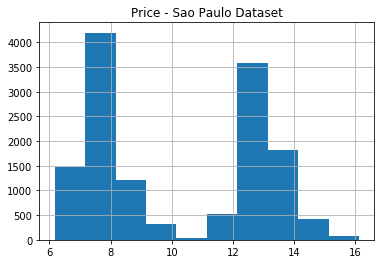

In [9]:
plt.title("Price - Sao Paulo Dataset")
np.log(geo_df_sp['Price']).hist();

__The above Histogram shows two types of price ranges, hence needs to be analyzed__

In [10]:
geo_df_sp.groupby('Negotiation Type').describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Negotiation Type,,,,,,,,
rent,7228.0,3077.669065,3522.830284,480.0,1350.0,2000.0,3300.0,50000.0
sale,6412.0,608624.140050,740451.549192,42000.0,250000.0,380000.0,679000.0,10000000.0


In [11]:
geo_df_sp['Negotiation Type'].value_counts(normalize= True)

rent    0.529912
sale    0.470088
Name: Negotiation Type, dtype: float64

In [12]:
geo_df_sp['Negotiation Type'].value_counts(normalize= True)

rent    0.529912
sale    0.470088
Name: Negotiation Type, dtype: float64

__After anaylisis I fopund that the price columns representst two set of pricing. One is Sale price and other price is renatl price. For my modeling I will be using only   rental price.__

__Brazil Data__

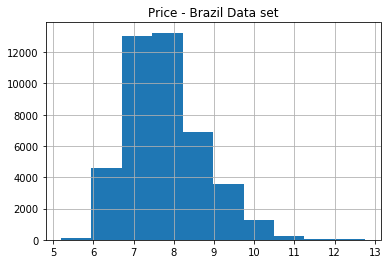

In [13]:
plt.title('Price - Brazil Data set')
np.log(geo_df_br['price']).hist();

__Preliminary plots__

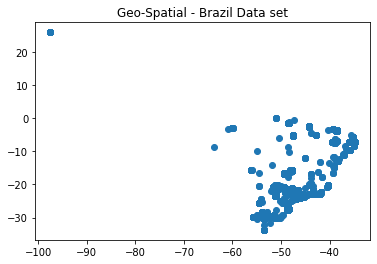

In [14]:
#Plotting Geo-Spatial data for Brazil dataset.
plt.title('Geo-Spatial - Brazil Data set')
plt.scatter(geo_df_br['lon'], geo_df_br['lat']);

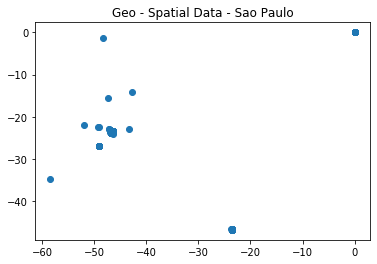

In [15]:
#Plotting Geo-Spatial data for Sao Paulo dataset.
plt.title("Geo - Spatial Data - Sao Paulo")
plt.scatter(geo_df_sp['Longitude'], geo_df_sp['Latitude']);

> Since our data has Geo-spatial information it is difficult to interpret the data using scatter plots. We will be using Cartopy for the rest of the plottings. 

__Plotting Brazil Data using CartoPy__

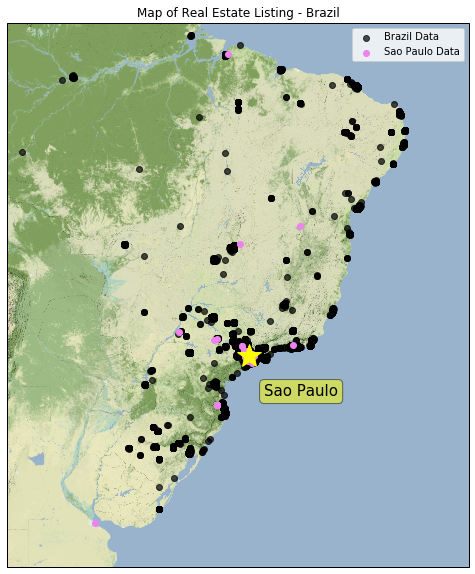

In [27]:
#https://scitools.org.uk/cartopy/docs/v0.15/examples/eyja_volcano.html

# Create a Stamen Terrain instance.
stamen_terrain = cimgt.StamenTerrain()
fig = plt.figure(figsize=(10, 10))


    # Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1,1,1,projection=stamen_terrain.crs)
#ax.add_feature(cfeature.STATES.with_scale('10m'))
#ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')

    # Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([-65, -30, 1, -36])

    # Add the Stamen data at zoom level 12.
ax.add_image(stamen_terrain, 7)


    # Add a marker.
plt.plot(-46.6333, -23.5505, marker='*', color='yellow', markersize=25,
             alpha= 1, transform=ccrs.Geodetic())


    # Use the cartopy interface to create a matplotlib transform object
    # for the Geodetic coordinate system. We will use this along with
    # matplotlib's offset_copy function to define a coordinate system which
    # translates the text by 25 pixels to the left.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

    # Add text.
plt.text(-38, -26, u'Sao Paulo',
             verticalalignment='center', horizontalalignment='right',
             transform=text_transform,
         fontdict={'size': 15},
             bbox=dict(facecolor='yellow', alpha=0.5, boxstyle='round'))
# Brazil Data
plt.scatter(geo_df_br['lon'], geo_df_br['lat'],
         color='black', marker='o',
         transform=ccrs.Geodetic(),
         alpha = 0.7,
         label= 'Brazil Data'
         )

# Sao Paulo Data
plt.scatter(geo_df_sp['Longitude'], geo_df_sp['Latitude'],
         color='violet', marker='o',
         transform=ccrs.Geodetic(),
         alpha = 1,
         label= 'Sao Paulo Data'
         )
plt.title("Map of Real Estate Listing - Brazil")
plt.legend()
plt.show()


#https://scitools.org.uk/cartopy/docs/v0.15/examples/eyja_volcano.html

__Extarcting Sao Paulo data from the Original (Brazil) dataset__

In [17]:
mask = geo_df_br.applymap(lambda x: '|São Paulo|' in str(x))
geo_df_br_sp = geo_df_br[mask.any(axis=1)]

# Shape of filtered dataset
geo_df_br_sp.shape

(38636, 25)

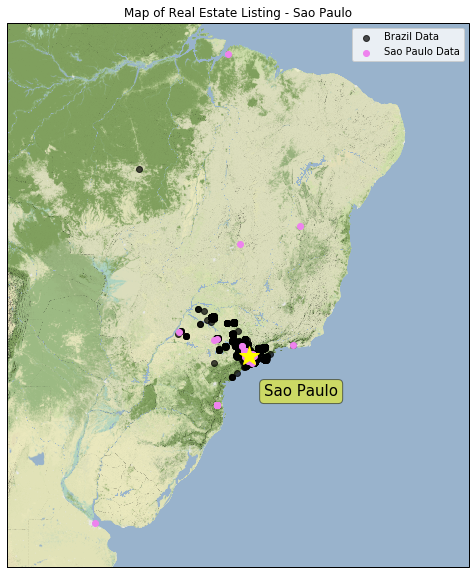

In [26]:
    # Create a Stamen Terrain instance.
stamen_terrain = cimgt.StamenTerrain()
fig = plt.figure(figsize=(10, 10))


    # Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1,1,1,projection=stamen_terrain.crs)
#ax.add_feature(cfeature.STATES.with_scale('10m'))
#ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')

    # Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([-65, -30, 1, -36])

    # Add the Stamen data at zoom level 12.
ax.add_image(stamen_terrain, 7)


    # Add a marker.
plt.plot(-46.6333, -23.5505, marker='*', color='yellow', markersize=20,
             alpha=1, transform=ccrs.Geodetic())


    # Use the cartopy interface to create a matplotlib transform object
    # for the Geodetic coordinate system. We will use this along with
    # matplotlib's offset_copy function to define a coordinate system which
    # translates the text by 25 pixels to the left.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

    # Add text.
plt.text(-38, -26, u'Sao Paulo',
             verticalalignment='center', horizontalalignment='right',
             transform=text_transform,
         fontdict={'size': 15},
             bbox=dict(facecolor='yellow', alpha=0.5, boxstyle='round'))

# Brazil Data
plt.scatter(geo_df_br_sp['lon'], geo_df_br_sp['lat'],
         color='black', marker='o',
         transform=ccrs.Geodetic(),
         alpha = 0.7,
         label= 'Brazil Data'
         )


# Sao Paulo Data
plt.scatter(geo_df_sp['Longitude'], geo_df_sp['Latitude'],
         color='violet', marker='o',
         transform=ccrs.Geodetic(),
         alpha = 1,
         label= 'Sao Paulo Data'
         )
plt.title("Map of Real Estate Listing - Sao Paulo")
plt.legend()
plt.show()


#https://scitools.org.uk/cartopy/docs/v0.15/examples/eyja_volcano.html

> The maps show us where the listings lie within the country of Brazil. Due to the concentration of listings around the city of Sao Paolo we decided to perform a case study on the city itself. The outliers seen in the maps do not concern us due to a radius that will be set later in the geoprocessing phase that will only consider listings within it. 

__Mapping Listings in Sao Paolo (Zoomed to City View)__

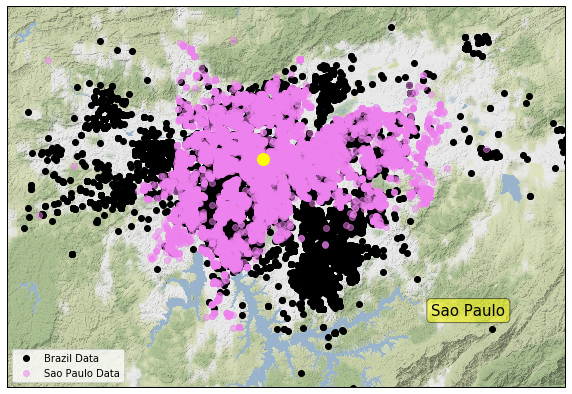

In [19]:
  # Create a Stamen Terrain instance.
stamen_terrain = cimgt.StamenTerrain()
fig = plt.figure(figsize=(10, 10))


    # Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1,1,1,projection=stamen_terrain.crs)

    # Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([-47, -46.2, -23.85, -23.35])

    # Add the Stamen data at zoom level 12.
ax.add_image(stamen_terrain, 12)


    # Add a marker.
plt.plot(-46.6333, -23.5505, marker='o', color='yellow', markersize=12,
             alpha=1, transform=ccrs.Geodetic())


    # Use the cartopy interface to create a matplotlib transform object
    # for the Geodetic coordinate system. We will use this along with
    # matplotlib's offset_copy function to define a coordinate system which
    # translates the text by 25 pixels to the left.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

    # Add text.
plt.text(-46.25, -23.75, u'Sao Paulo',
             verticalalignment='center', horizontalalignment='right',
             transform=text_transform,
         fontdict={'size': 15},
             bbox=dict(facecolor='yellow', alpha=0.5, boxstyle='round'))

# Brazil Data
plt.scatter(geo_df_br_sp['lon'], geo_df_br_sp['lat'],
         color='black', marker='o',
         transform=ccrs.Geodetic(),
         alpha = 1,
         label= 'Brazil Data'
         )


# Sao Paulo Data
plt.scatter(geo_df_sp['Longitude'], geo_df_sp['Latitude'],
         color='violet', marker='o',
         transform=ccrs.Geodetic(),
         alpha = 0.5,
         label= 'Sao Paulo Data'
         )

plt.legend()
plt.show()


#Adapted from: https://scitools.org.uk/cartopy/docs/v0.15/examples/eyja_volcano.html

> The map shows us that the combination of the two datasets allow us to have more data covering the whole city. To see the realtionship between these listings and pre-existing favelas we perform a case study around the well known favela, Parasaipolis. 

__Case Study Parasaipolis__

In [22]:
#Creating a Grid around Parasaipolis
BBox = [-46.7483, -46.7054,      
         -23.5936, -23.6355]

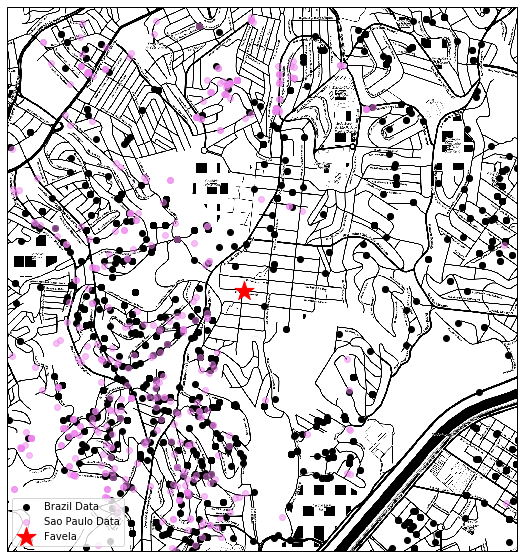

In [24]:
# Create a Stamen Terrain instance.
stamen_terrain = cimgt.Stamen(style='Toner')
fig = plt.figure(figsize=(10, 10))


# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1,1,1,projection=stamen_terrain.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent(BBox)

# Add the Stamen data at zoom level 16.
ax.add_image(stamen_terrain, 16)


# Use the cartopy interface to create a matplotlib transform object
# for the Geodetic coordinate system. We will use this along with
# matplotlib's offset_copy function to define a coordinate system which
# translates the text by 25 pixels to the left.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)


# Brazil Data
plt.scatter(geo_df_br_sp['lon'], geo_df_br_sp['lat'],
         color='black', marker='o',
         transform=ccrs.Geodetic(),
         alpha = 1,
         label= 'Brazil Data'
         )

# Sao Paulo Data
plt.scatter(geo_df_sp['Longitude'], geo_df_sp['Latitude'],
         color='violet', marker='o',
         transform=ccrs.Geodetic(),
         alpha = 0.5,
         label= 'Sao Paulo Data'
         )

# Favela Marker
plt.scatter(-46.728400,-23.615466, marker = '*', color = 'r',
           transform=ccrs.Geodetic(), s= 400, label='Favela')


plt.legend(loc='lower left')
plt.show()

#Adapted from: https://scitools.org.uk/cartopy/docs/v0.15/examples/eyja_volcano.html

__Preparing Data for Geoprocessing__

In [ ]:
#Columns found in both Brazil and Sao Paulo data frames.

In [ ]:
list(geo_df_br_sp.columns)[0:5]

In [ ]:
list(geo_df_sp.columns)[0:5]

In [ ]:
# Renaming the columns so both DataFrames match
geo_df_sp.rename(inplace = True, columns= {
                                    'Negotiation Type' : 'operation',
                                    'Property Type' : 'property_type',
                                    'Latitude' : 'lat',
                                    'Longitude' : 'lon',
                                    'Price' : 'price'
});

In [ ]:
# Selecting only the columns (from Sao Paulo data frame) we will be using for geoprocessing
data_sp_concat = geo_df_sp[['operation', 'property_type', 'lat', 'lon', 'price']]

In [ ]:
# Selecting only the columns (from Barzil data frame) we will be using for geoprocessing
data_brazil_concat = geo_df_br_sp[['operation', 'property_type', 'lat', 'lon', 'price']]

In [ ]:
# Selecting listings with a price to maintain the complete 
data_brazil_concat = data_brazil_concat[data_brazil_concat['price'].isnull() == 0]

In [ ]:
set(data_brazil_concat.columns) == set(data_sp_concat.columns)

In [ ]:
# Checking null values
data_sp_concat.isnull().sum().sum()

In [ ]:
# Checking null values
data_brazil_concat.isnull().sum().sum()

In [ ]:
data_sp_concat.head(3)

In [ ]:
data_brazil_concat.head(3)

In [ ]:
data_sp_concat.to_csv('../datasets/data_sp_concat.csv', index = False)
data_brazil_concat.to_csv('../datasets/data_brazil_concat.csv', index = False)

* [Geoprocessing Notebook Link - Jupyter Notebook Server](http://localhost:8888/notebooks/Projects/project_5/geoprocessing/Geoprocessing.ipynb)

* [Geoprocessing Notebook Link - GitHub View](https://git.generalassemb.ly/kraja/Informal_settlement-Identification/blob/master/geoprocessing/Geoprocessing.ipynb)

> Due to the length of the geoprocessing phase of the project, all geoprocessing was done in its own notebook.